In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [6]:
df= pd.read_csv('final_a.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'final_a.csv'

In [ ]:
#data understanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Date                                           228 non-null    object 
 1   12-Month Inflation(%)                          228 non-null    float64
 2   Total Remittances                              228 non-null    float64
 3   Total Debt                                     204 non-null    float64
 4   Imports                                        228 non-null    int64  
 5   Exports                                        228 non-null    int64  
 6   Foreign direct investment                      228 non-null    float64
 7   IBRD loans and IDA credits (DOD, current US$)  228 non-null    int64  
 8   Unemployment Rate                              228 non-null    float64
 9   exchange_rate                                  228 non

In [ ]:
df.shape

(228, 20)

In [ ]:
df.describe()

,12-Month Inflation(%),Total Remittances,Total Debt,Imports,Exports,Foreign direct investment,"IBRD loans and IDA credits (DOD, current US$)",Unemployment Rate,exchange_rate,Deposit,Savings,Lending,Overdraft,Interbank Rate,91-Day Tbill,Cash Reserve Requirement,Central Bank Rate
count,228.000000,228.000000,2.040000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,211.000000
mean,7.581096,148026.619123,2.873573e+06,1.666794e+10,9.954672e+09,-4.252783e+08,5.434430e+09,3.605263,92.866645,6.122018,2.667061,14.392456,14.206667,6.817851,8.250618,5.104167,9.137441
std,3.969982,104365.181010,2.210692e+06,4.792054e+09,2.188579e+09,4.953038e+08,3.014285e+09,1.238793,18.254012,1.501907,1.688546,2.133058,2.281529,3.943125,2.852604,0.604548,2.392711
min,1.850000,26056.000000,7.211873e+05,6.739990e+09,5.341992e+09,-1.364485e+09,2.663224e+09,2.650000,61.980000,3.080000,0.960000,11.750000,11.150000,0.980000,1.600000,4.250000,5.750000
25%,5.060000,53352.255000,1.003756e+06,1.252904e+10,8.138888e+09,-7.709787e+08,3.156096e+09,2.740000,77.982500,4.497500,1.500000,12.837500,12.800000,4.617500,7.017500,4.500000,7.625000
50%,6.440000,116582.670000,1.930435e+06,1.771164e+10,1.044871e+10,-3.526285e+08,4.199127e+09,2.770000,89.507500,6.545000,1.705000,13.735000,13.650000,6.410000,7.930000,5.250000,8.750000
75%,8.402500,222000.115000,4.497684e+06,2.027930e+10,1.147124e+10,-5.181906e+07,7.124964e+09,5.010000,103.233750,7.170000,3.645000,15.295000,15.205000,7.790000,8.777500,5.250000,10.000000
max,19.720000,378053.010000,8.206740e+06,2.460558e+10,1.395358e+10,3.871569e+08,1.246476e+10,5.810000,153.240000,10.100000,7.010000,20.340000,20.530000,28.900000,21.650000,6.000000,18.000000


In [ ]:
df.isnull().sum()

Date                                              0
12-Month Inflation(%)                             0
Total Remittances                                 0
Total Debt                                       24
Imports                                           0
Exports                                           0
Foreign direct investment                         0
IBRD loans and IDA credits (DOD, current US$)     0
Unemployment Rate                                 0
exchange_rate                                     0
Deposit                                           0
Savings                                           0
Lending                                           0
Overdraft                                         0
Interbank Rate                                    0
91-Day Tbill                                      0
182-days Tbill                                    0
364-days Tbill                                    0
Cash Reserve Requirement                          0
Central Bank

In [ ]:
#handling missing values
df['Total Debt'] = df['Total Debt'].fillna(df['Total Debt'].mean())
df['Central Bank Rate'] = df['Central Bank Rate'].fillna(df['Central Bank Rate'].median())

In [ ]:
df.isna().sum()

Date                                             0
12-Month Inflation(%)                            0
Total Remittances                                0
Total Debt                                       0
Imports                                          0
Exports                                          0
Foreign direct investment                        0
IBRD loans and IDA credits (DOD, current US$)    0
Unemployment Rate                                0
exchange_rate                                    0
Deposit                                          0
Savings                                          0
Lending                                          0
Overdraft                                        0
Interbank Rate                                   0
91-Day Tbill                                     0
182-days Tbill                                   0
364-days Tbill                                   0
Cash Reserve Requirement                         0
Central Bank Rate              

In [ ]:
def plot_all_numeric(df):
    # Convert 'Date' to datetime and set as index
    df_plot = df.copy()
    df_plot['Date'] = pd.to_datetime(df_plot['Date'], errors='coerce', dayfirst=True)
    df_plot = df_plot.set_index('Date')
    
    # Convert columns that should be numeric but are object
    for col in df_plot.columns:
        if df_plot[col].dtype == 'object':
            df_plot[col] = pd.to_numeric(df_plot[col], errors='coerce')
    
    # Plot all numeric columns
    numeric_cols = df_plot.select_dtypes(include=[np.number]).columns
    df_plot[numeric_cols].plot(subplots=True, figsize=(15, 30), layout=(-1, 3), title=numeric_cols)
    plt.tight_layout()
    plt.show()

ValueError: The truth value of a Index is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

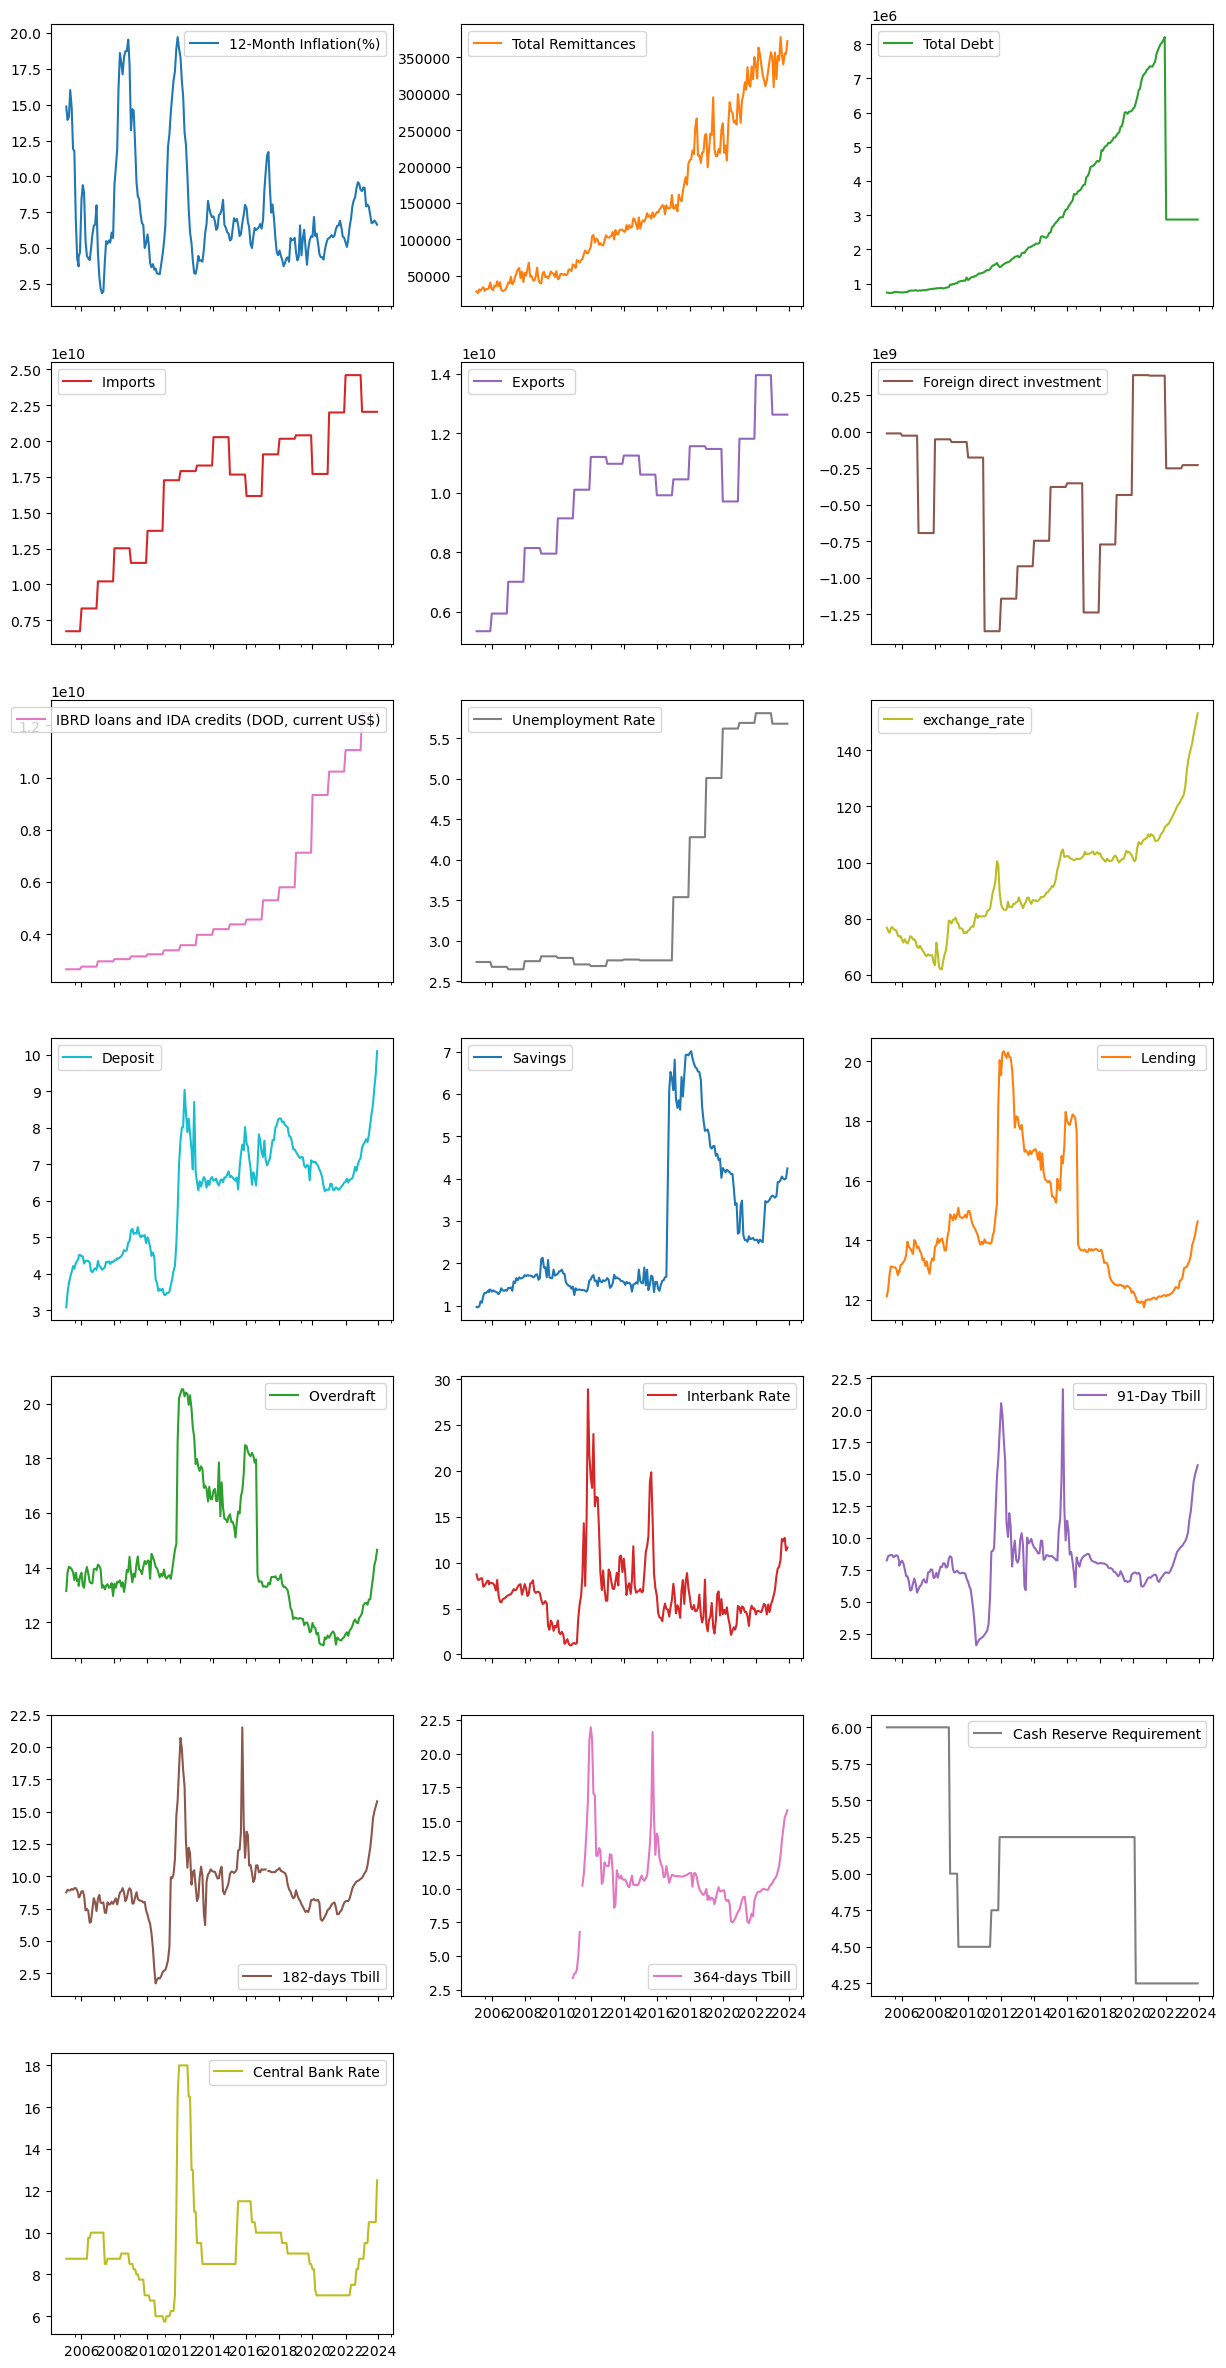

In [ ]:
plot_all_numeric(df)

In [ ]:
#figure out the function to plot individually.

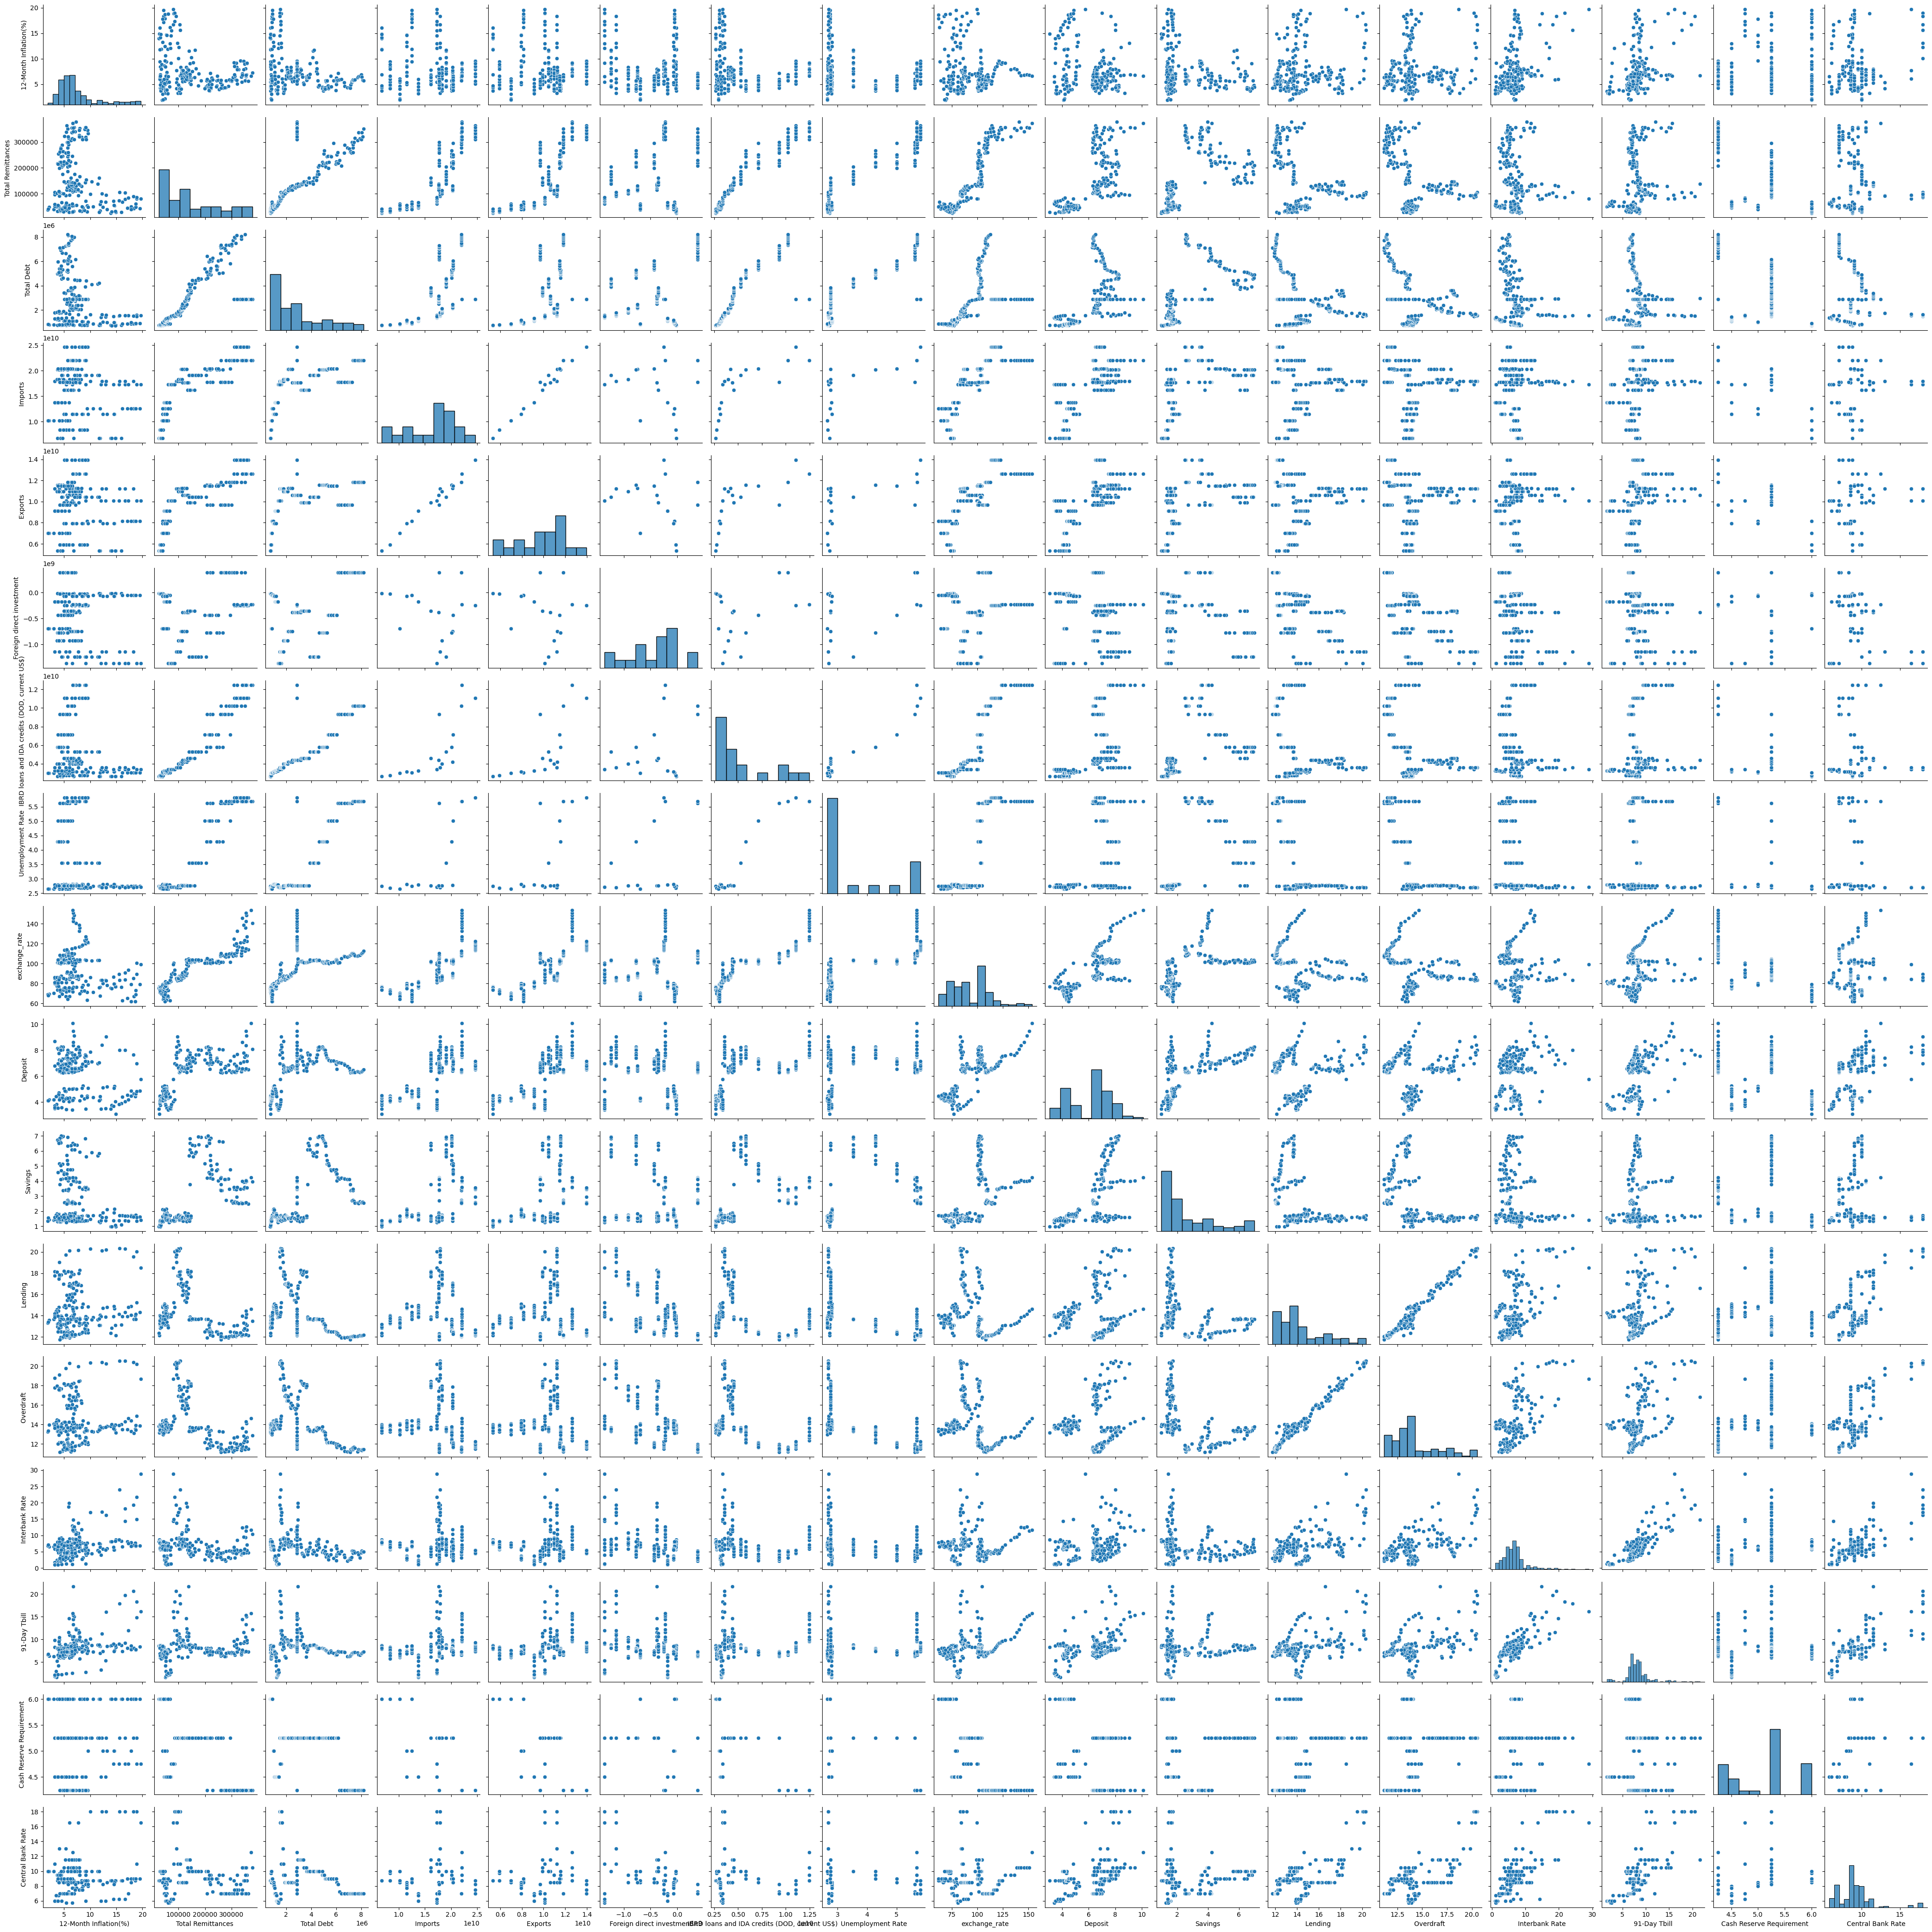

In [ ]:
#sns.pairplot(df) 

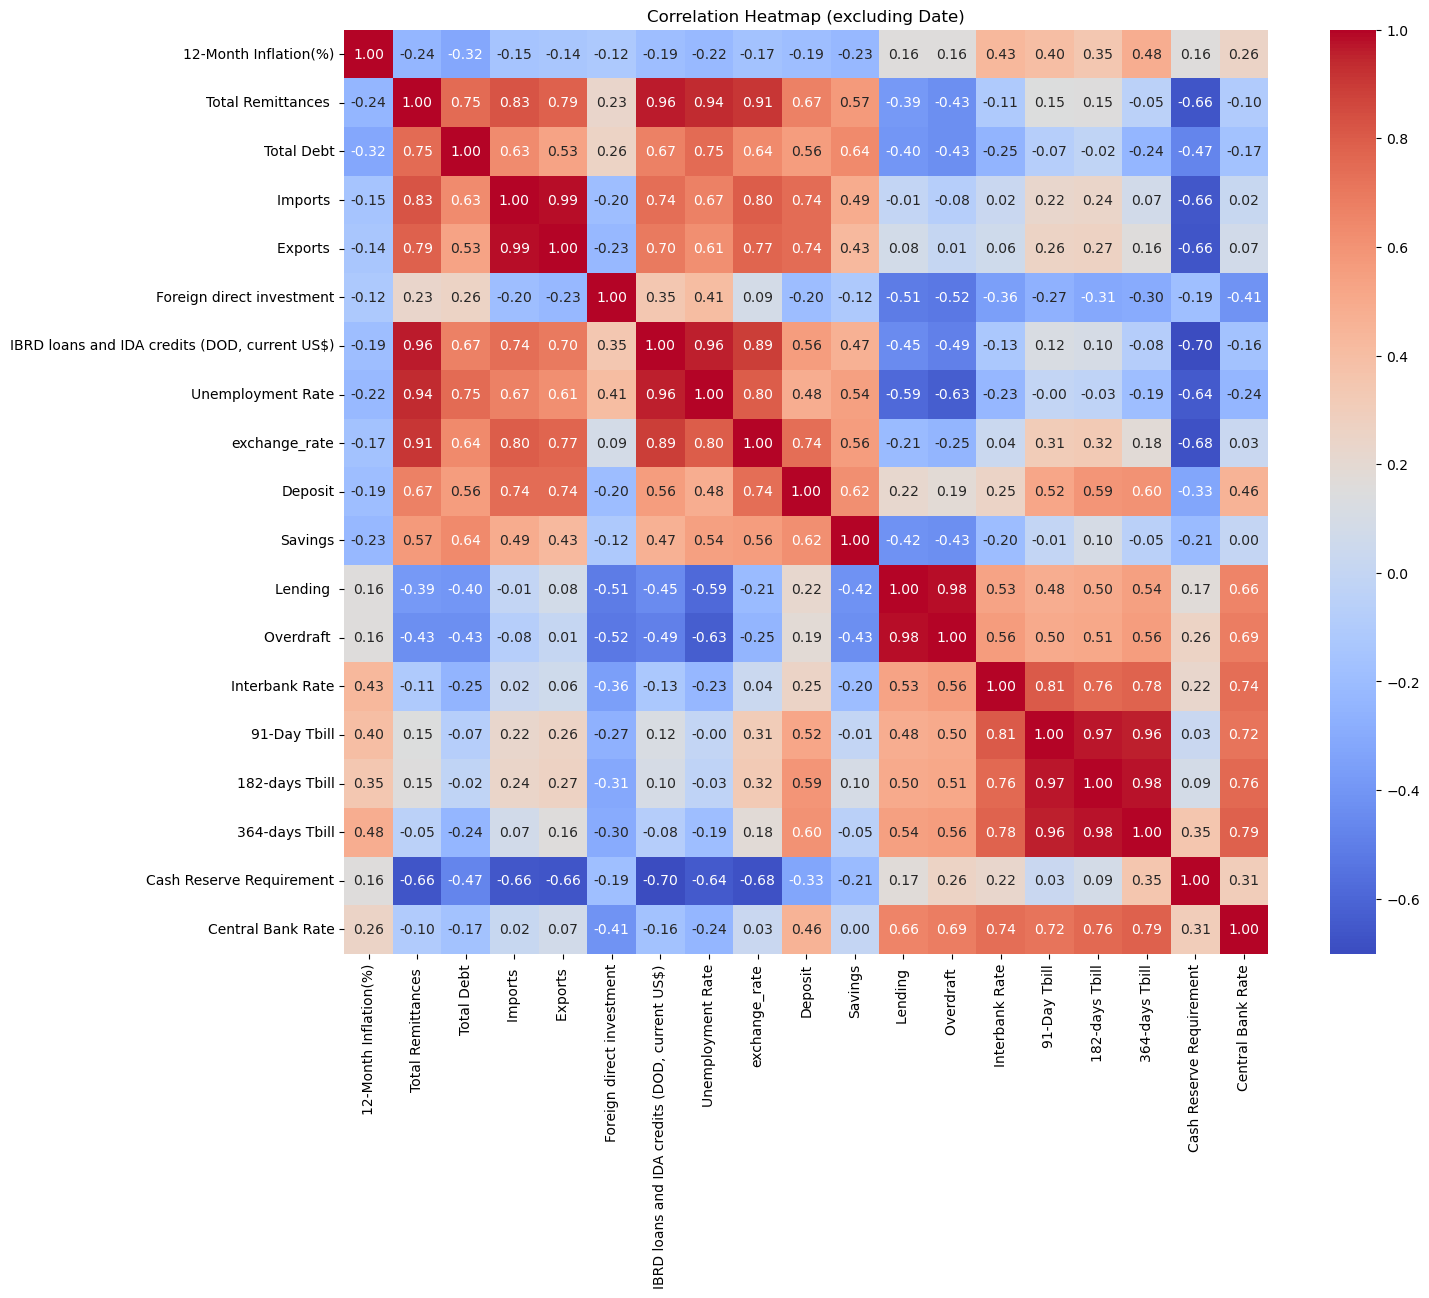

In [ ]:
# Convert object columns (except 'Date') to numeric if possible
df_heatmap = df.copy()
for col in df_heatmap.columns:
    if col != 'Date' and df_heatmap[col].dtype == 'object':
        df_heatmap[col] = pd.to_numeric(df_heatmap[col], errors='coerce')

corr = df_heatmap.drop(columns=['Date']).corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap (excluding Date)')
plt.show()

In [ ]:
sns.heatmap(df)

ValueError: could not convert string to float: '31 01 2005'

In [ ]:
df.duplicated()

NameError: name 'df' is not defined